In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Point
from shapely.ops import unary_union
from shapely.plotting import plot_polygon
import random
import numpy as np

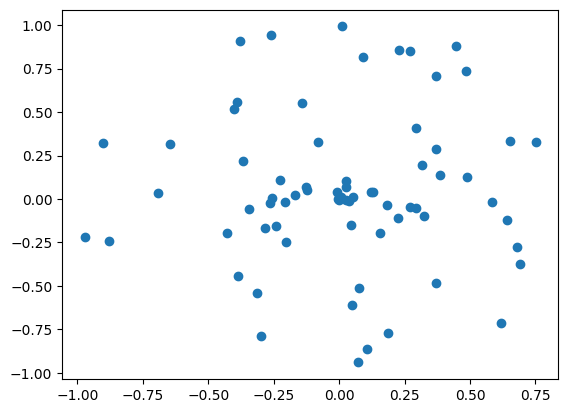

In [92]:
NY = 70
r = np.random.rand(NY)
theta = np.random.rand(NY) * 2 * np.pi
Y = np.vstack((r * np.cos(theta), r * np.sin(theta))).T
plt.scatter(Y[:, 0], Y[:, 1])

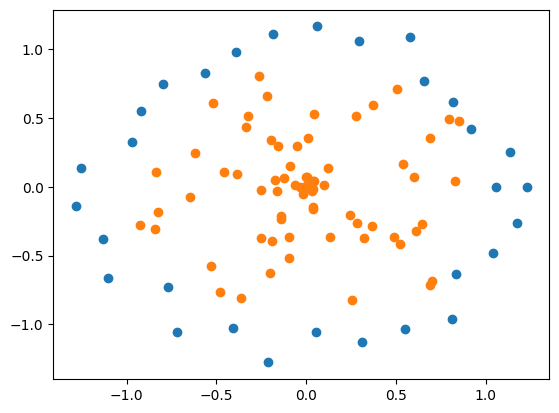

In [88]:
NX = 30
r = np.random.rand(NX) * 0.3 + 1
theta = np.linspace(0, 2 * np.pi, NX)
X = np.vstack([r * np.cos(theta), r * np.sin(theta)]).T
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1])

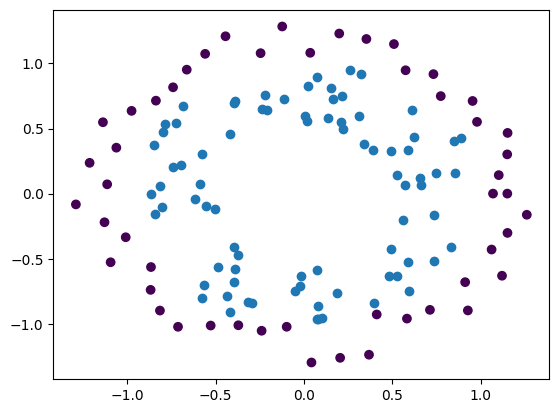

In [68]:
gamma = 0.6
# any x in X is included iff there exists y in Y such that ||x - y|| <= gamma
isincluded = np.zeros(NX, dtype=bool)
for i in range(NX):
    for j in range(NY):
        if np.linalg.norm(X[i] - Y[j]) <= gamma:
            isincluded[i] = 1
            break
plt.scatter(X[:, 0], X[:, 1], c=isincluded)
plt.scatter(Y[:, 0], Y[:, 1])

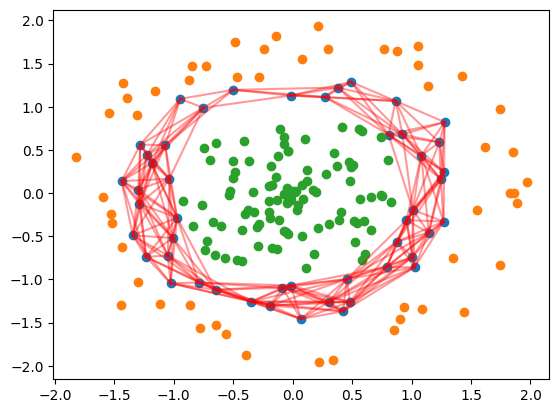

In [26]:
edges = []
r = 0.9
for i in range(NX):
    if not isincluded[i]:
        continue
    for j in range(i + 1, NX):
        if not isincluded[j]:
            continue
        if np.linalg.norm(X[i] - X[j]) <= r:
            edges.append((i, j))
plt.scatter(X[isincluded][:, 0], X[isincluded][:, 1])
plt.scatter(X[~isincluded][:, 0], X[~isincluded][:, 1])
plt.scatter(Y[:, 0], Y[:, 1])
for i, j in edges:
    plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], color='r', alpha=0.4)
plt.show()

/tmp/ipykernel_78367/760608447.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(Y[:, 0], Y[:, 1], marker='o', label='Elements of Y', c=plt.get_cmap('tab10')(2))


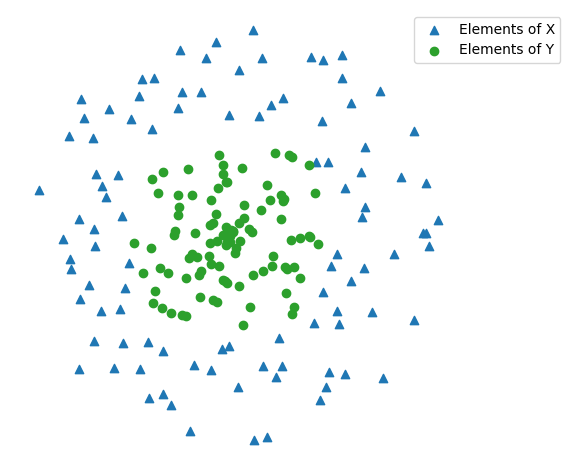

In [27]:
circles = [Point(x, y).buffer(gamma, resolution=256) for (x, y) in Y]
union_poly = unary_union(circles)
plt.clf()
# plot_polygon(union_poly, add_points=False, color='gray')
plt.scatter(X[:, 0], X[:, 1], marker='^', label='Elements of X')
# plt.scatter(X[isincluded][:, 0], X[isincluded][:, 1], marker='^', label='Elements of X\nincluded in $L\\check{C}$')
# plt.scatter(X[~isincluded][:, 0], X[~isincluded][:, 1], marker='^', label='Elements of X\nnot included in $L\\check{C}$')
plt.scatter(Y[:, 0], Y[:, 1], marker='o', label='Elements of Y', c=plt.get_cmap('tab10')(2))
# for idx, (i, j) in enumerate(edges):
#     plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], color='r', alpha=0.4, label='Edges in $L\\check{C}$' if idx == 0 else None)
plt.axis('off')
# poly_patch = mpatches.Patch(color='gray', label='Union of $B_\\gamma(y)$')
# handles, labels = plt.gca().get_legend_handles_labels()
# handles.append(poly_patch)
# plt.legend(handles=handles)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-2.1, 3.2)
plt.tight_layout()
plt.savefig('plots/lc_points.pgf')

In [28]:
isincluded

array([False, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True,  True, False, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False])

In [29]:
isincluded[57] = False
X[57] = np.array([-0.7, 0.6])

In [18]:
X[38] = np.array([0.4, -0.95])

In [19]:
np.save("data/lc_x.npz", X)
np.save("data/lc_y.npz", Y)

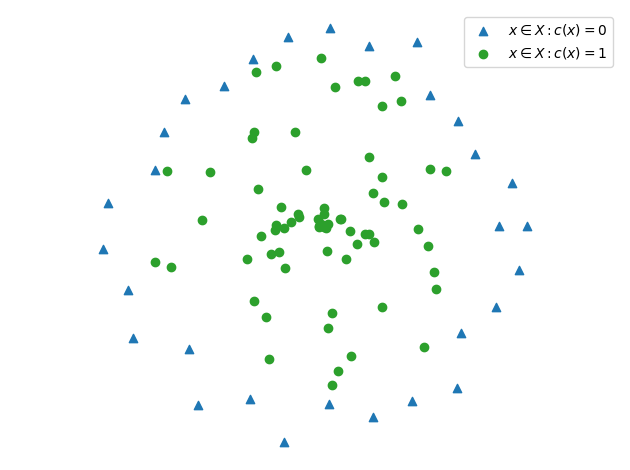

In [99]:
r = 0.5
edges = []
for i in range(NX):
    for j in range(NY):
        if np.linalg.norm(X[i] - Y[j]) <= r:
            edges.append((i, j))
xx_edges = []
for i in range(NX):
    for j in range(i + 1, NX):
        for k in range(NY):
            if (i, k) in edges and (j, k) in edges:
                xx_edges.append((i, j))
                break
yy_edges = []
for i in range(NY):
    for j in range(i + 1, NY):
        for k in range(NX):
            if (k, i) in edges and (k, j) in edges:
                yy_edges.append((i, j))
xxx_triangles = []
xxy_triangles = []
xyy_triangles = []
def helper(a, b, arr):
    return (a, b) in arr
for i in range(NX):
    for j in range(i + 1, NX):
        for k in range(j + 1, NX):
            if helper(i, j, xx_edges) and helper(j, k, xx_edges) and helper(i, k, xx_edges):
                xxx_triangles.append((i, j, k))
        for k in range(NY):
            if helper(i, j, xx_edges) and helper(j, k, edges) and helper(i, k, edges):
                xxy_triangles.append((i, j, k))
    for j in range(NY):
        for k in range(j + 1, NY):
            if helper(j, k, yy_edges) and helper(i, j, edges) and helper(i, k, edges):
                xyy_triangles.append((i, j, k))
            

plt.clf()
# for i, j, k in xxx_triangles:
#     tri = plt.Polygon([X[i], X[j], X[k]], color='gray', alpha=0.4)
#     plt.gca().add_patch(tri)
# for i, j, k in xxy_triangles:
#     tri = plt.Polygon([X[i], X[j], Y[k]], color='gray', alpha=0.4)
#     plt.gca().add_patch(tri)
# for i, j, k in xyy_triangles:
#     tri = plt.Polygon([X[i], Y[j], Y[k]], color='gray', alpha=0.4)
#     plt.gca().add_patch(tri)
# for idx, (i, j) in enumerate(edges):
#     plt.plot([X[i, 0], Y[j, 0]], [X[i, 1], Y[j, 1]], color='r', alpha=0.4, label='Edges in LVR' if idx == 0 else None)
# for i, j in xx_edges:
#     plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], color='r', alpha=0.4)
# for i, j in yy_edges:
#     plt.plot([Y[i, 0], Y[j, 0]], [Y[i, 1], Y[j, 1]], color='r', alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], marker='^', label='$x \in X : c(x) = 0$')
plt.scatter(Y[:, 0], Y[:, 1], marker='o', label='$x \in X : c(x) = 1$', color=plt.get_cmap('tab10')(2))
plt.legend()
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.tight_layout()
plt.savefig('plots/lvr_points.pgf')